In [1]:
from utils import Node,valid_connection
import graphviz
import os
import matplotlib.pyplot as plt
import numpy
os.environ["PATH"] += os.pathsep + r'C:\Program Files\Graphviz\bin'
import random

In [2]:
def node_distance(n1:Node,n2:Node):
    return ((n1.position[0]-n2.position[0])**2+(n1.position[1]-n2.position[1])**2)**0.5

In [3]:
m_entrance = (180,120)
m_exit = (360,240)

In [4]:
enter_node = Node(*m_entrance)

In [5]:
[direction for direction in enter_node.edges if enter_node.edges[direction] == None]

['N', 'E', 'S', 'W']

In [6]:
def generate_node(n1:Node):
    a_dir = [direction for direction in n1.edges if n1.edges[direction]==None]
    if len(a_dir)==0:
        return "no directions possible"
    valid = 0
    x = n1.position[0]
    y = n1.position[1]
    while not valid:
        direction = a_dir[numpy.random.randint(0,len(a_dir)-1)]
        distance = int(round(numpy.random.normal(50,7),0))
        valid = bool(valid_connection(n1, direction,distance))
    match(direction):
        case "N":
            y = y+distance
        case "E":
            x = x+distance
        case "S":
            y = y-distance
        case "W":
            s = s-distance
    n2 = Node(x,y)
    n1.connect(n2,direction)
    return 1


    
    

In [30]:
generate_node(enter_node)

1

In [31]:
[edge+":"+str(enter_node.edges[edge].position) for edge in enter_node.edges if enter_node.edges[edge]!=None]

['E:(225, 120)']

In [32]:
enter_node.edges['S'].edges

AttributeError: 'NoneType' object has no attribute 'edges'

In [33]:
def plot_node(arr,n1:Node):
    position = n1.position
    closed_edges = [i for i in n1.edges if n1.edges[i]==None]

    if position[0]-10<0:
        x_edges = (0,position[0]+10)
    elif position[0]+10>360:
        x_edges = (position[0]-10,359)
    else:
        x_edges = (position[0]-10,position[0]+10)
    
    if position[1]-10<0:
        y_edges = (0,position[1]+10)
    elif position[0]+10>240:
        y_edges = (position[1]-10,239)
    else:
        y_edges = (position[1]-10,position[1]+10)

    for direction in closed_edges:
        match(direction):
            case "N":
                for i in range(x_edges[0],x_edges[1]):
                    arr[y_edges[1]][i]=100
            case "E":
                for i in range(y_edges[0],y_edges[1]):
                    arr[i][x_edges[1]]=100
            case "S":
                for i in range(x_edges[0],x_edges[1]):
                    arr[y_edges[0]][i]=100
            case "W":
                for i in range(y_edges[0],y_edges[1]):
                    arr[i][x_edges[0]]=100
     
    return arr



In [34]:
def graph_nodes(n1:Node):
    z = numpy.zeros((240,360))    
    explored = []
    unvisited = [n1]
    def recursion(n2:Node,arr):
        unvisited.remove(n2)
        explored.append(n2)
        a_nodes = [n2.edges[node] for node in n2.edges if n2.edges[node] not in explored and n2.edges[node] != None]
        unvisited.extend(a_nodes)
        arr = plot_node(arr,n2)
    while(unvisited):
        recursion(unvisited[0],z)
    return z

            

In [35]:
z = graph_nodes(enter_node)

In [28]:
z=numpy.zeros((240,360))
z=plot_node(z,enter_node)

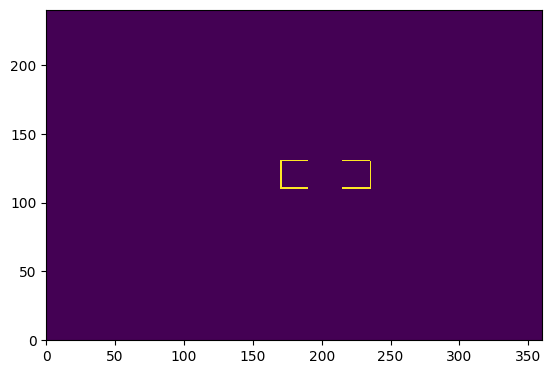

In [36]:
plt.pcolormesh(z)
plt.gca().set_aspect('equal')
plt.show()
